In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import os 

# Revenue

## 주차별 week num 부여 -> 2022년 7월 마지막주차 부터 0으로 시작하여 desc

In [3]:
dfr = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/mobile_revenue/mobile_revenue_rank_30.csv',encoding='utf-8')
dfr

,rank,rank_change,app_name,publisher_name,google_rank,apple_rank,onestore_rank
0,1,0.0,리니지2M,NCSOFT,1.0,1.0,NaN
1,2,0.0,리니지M,NCSOFT,2.0,2.0,NaN
2,3,0.0,라이즈 오브 킹덤즈,LilithGames,3.0,3.0,NaN
3,4,0.0,기적의 검,4399 KOREA,5.0,6.0,2.0
4,5,0.0,V4,NEXON Company,4.0,5.0,NaN
...,...,...,...,...,...,...,...
4015,26,-6.0,한게임 포커,NHN BIGFOOT,25.0,39.0,44.0
4016,27,-5.0,뮤오리진3,Webzen Inc.,21.0,47.0,NaN
4017,28,0.0,세븐나이츠 레볼루션,Netmarble,47.0,5.0,NaN
4018,29,6.0,제2의 나라: Cross Worlds,Netmarble,26.0,21.0,NaN


In [6]:
share = 133 - df.index // 30
dfr['week_num'] = share
dfr 

,rank,rank_change,app_name,publisher_name,google_rank,apple_rank,onestore_rank,week_num
0,1,0.0,리니지2M,NCSOFT,1.0,1.0,NaN,133
1,2,0.0,리니지M,NCSOFT,2.0,2.0,NaN,133
2,3,0.0,라이즈 오브 킹덤즈,LilithGames,3.0,3.0,NaN,133
3,4,0.0,기적의 검,4399 KOREA,5.0,6.0,2.0,133
4,5,0.0,V4,NEXON Company,4.0,5.0,NaN,133
...,...,...,...,...,...,...,...,...
4015,26,-6.0,한게임 포커,NHN BIGFOOT,25.0,39.0,44.0,0
4016,27,-5.0,뮤오리진3,Webzen Inc.,21.0,47.0,NaN,0
4017,28,0.0,세븐나이츠 레볼루션,Netmarble,47.0,5.0,NaN,0
4018,29,6.0,제2의 나라: Cross Worlds,Netmarble,26.0,21.0,NaN,0


In [23]:
# 게임 갯수 세기

mobile_name_revenue20 = pd.DataFrame(dfr['app_name'].value_counts().head(30))
mobile_name_revenue20

,app_name
리니지2M,134
라이즈 오브 킹덤즈,134
기적의 검,134
FIFA ONLINE 4 M by EA SPORTS™,134
블레이드&소울 레볼루션,134
리니지M,134
리니지2 레볼루션,123
V4,108
바람의나라: 연,107
원신,86


In [ ]:
# mobile revenue rank 30위권에 든 빈도수

## 한국어 폰트가 없다...!

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(mobile_name_revenue20.index, mobile_name_revenue20['app_name'])

## 모바일 게임 간 수익 랭킹 비교

In [17]:
bg = dfr.loc[dfr['app_name'] == '배틀그라운드']

ln2 = dfr.loc[dfr['app_name'] == '리니지2M']
rok = dfr.loc[dfr['app_name'] == '라이즈 오브 킹덤즈']
gg = dfr.loc[dfr['app_name'] == '기적의 검']
ff =  dfr.loc[dfr['app_name'] == 'FIFA ONLINE 4 M by EA SPORTS™']
bs = dfr.loc[dfr['app_name'] == '블레이드&소울 레볼루션']
lnm = dfr.loc[dfr['app_name'] == '리니지M']
ln2r = dfr.loc[dfr['app_name'] == '리니지2 레볼루션']
v4 = dfr.loc[dfr['app_name'] == 'V4']
wind = dfr.loc[dfr['app_name'] == '바람의나라:연']
ws = dfr.loc[dfr['app_name'] == '원신']
kart = dfr.loc[dfr['app_name'] == '카트라이더 러쉬플러스']
a3 = dfr.loc[dfr['app_name'] == 'A3: 스틸얼라이브']

### 리니지 게임 간 수익 순위 비교

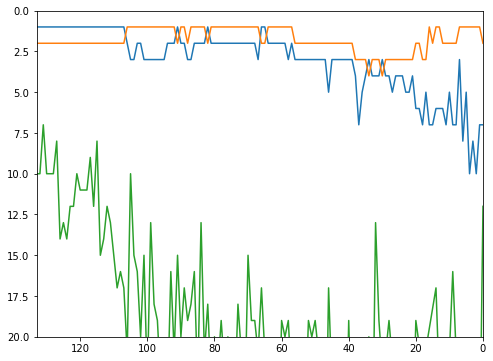

In [18]:
plt.figure(figsize = (8, 6))
plt.plot(ln2['week_num'],ln2['rank'])
plt.plot(lnm['week_num'],lnm['rank'])
plt.plot(ln2r['week_num'],ln2r['rank'])
plt.ylim(20,0)
plt.xlim(133,0)
plt.show()

### 리니지 게임과 배틀 그라운드간 수익 순위 비교

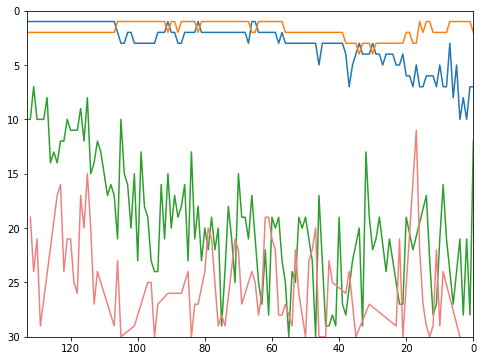

In [20]:
plt.figure(figsize = (8, 6))
plt.plot(ln2['week_num'],ln2['rank'])
plt.plot(lnm['week_num'],lnm['rank'])
plt.plot(ln2r['week_num'],ln2r['rank'])
plt.plot(bg['week_num'],bg['rank'],color = "lightcoral")
plt.ylim(30,0)
plt.xlim(133,0)
plt.show()

### 배틀 그라운드, a3 간 비교

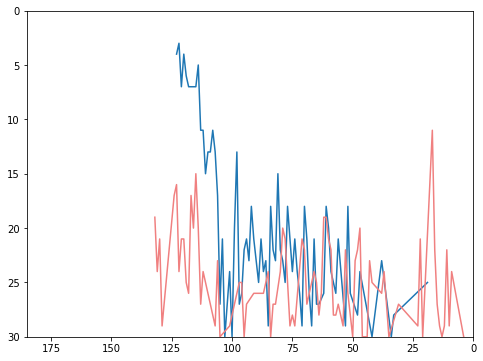

In [22]:
plt.figure(figsize = (8, 6))
plt.plot(a3['week_num'],a3['rank'])
plt.plot(bg['week_num'],bg['rank'],color = "lightcoral")
plt.ylim(30,0)
plt.xlim(185,0)
plt.show()

__같은 FPS게임인 'A3: 스틸얼라이브' 와의 비교 현황 입니다.
배틀 그라운드보다 순위가 높던 A3도 순위가 하락한 끝에 배틀 그라운드가 더 높은 순위에 랭크된 것을 볼 수 있습니다.__

# User

## 주차별 week num 부여 -> 2022년 7월 마지막주차 부터 0으로 시작하여 desc

In [26]:
dfu = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/mobile_user/mobile_user_rank_30.csv',encoding='utf-8')
dfu

,rank,rank_change,app_name,publisher_name,biz_category_sub,value
0,1,NaN,브롤스타즈,Supercell,액션게임,-9.99
1,2,NaN,배틀그라운드,"KRAFTON, Inc.",슈팅게임,-2.12
2,3,NaN,클래시 로얄,Supercell,전략게임,-1.89
3,4,1.0,피망 뉴맞고: 고스톱 대표 맞고 게임,NEOWIZ corp,카지노게임,1.15
4,5,-1.0,무한의 계단,NFLY STUDIO,아케이드게임,-8.00
...,...,...,...,...,...,...
4015,26,2.0,프로젝트 세카이 컬러풀 스테이지! feat.하츠네 미쿠,Nuverse,리듬/타일게임,18.92
4016,27,-2.0,리그 오브 레전드: 와일드 리프트,"Riot Games, Inc",전략게임,-1.29
4017,28,-2.0,꿈의 정원 (Gardenscapes),Playrix,캐주얼게임,0.40
4018,29,10.0,메이플스토리M,NEXON Company,롤플레잉게임,29.12


In [28]:
share = 133 - df.index // 30
dfu['week_num'] = share
dfu 

,rank,rank_change,app_name,publisher_name,biz_category_sub,value,week_num
0,1,NaN,브롤스타즈,Supercell,액션게임,-9.99,133
1,2,NaN,배틀그라운드,"KRAFTON, Inc.",슈팅게임,-2.12,133
2,3,NaN,클래시 로얄,Supercell,전략게임,-1.89,133
3,4,1.0,피망 뉴맞고: 고스톱 대표 맞고 게임,NEOWIZ corp,카지노게임,1.15,133
4,5,-1.0,무한의 계단,NFLY STUDIO,아케이드게임,-8.00,133
...,...,...,...,...,...,...,...
4015,26,2.0,프로젝트 세카이 컬러풀 스테이지! feat.하츠네 미쿠,Nuverse,리듬/타일게임,18.92,0
4016,27,-2.0,리그 오브 레전드: 와일드 리프트,"Riot Games, Inc",전략게임,-1.29,0
4017,28,-2.0,꿈의 정원 (Gardenscapes),Playrix,캐주얼게임,0.40,0
4018,29,10.0,메이플스토리M,NEXON Company,롤플레잉게임,29.12,0


In [29]:
mobile_name_user20 = pd.DataFrame(dfu['app_name'].value_counts().head(30))
mobile_name_user20

,app_name
브롤스타즈,134
Pokémon GO,134
한게임 신맞고 : 대한민국 원조 고스톱,134
캔디크러쉬사가,134
꿈의 집 (Homescapes),134
쿠키런: 오븐브레이크 - 쿠키들의 러닝 게임!,134
애니팡2,134
프렌즈팝콘,134
배틀그라운드,134
클래시 오브 클랜,134


## 모바일 게임 간 유저 수 비교

In [48]:
bg_u = dfu.loc[dfu['app_name'] == '배틀그라운드']

brst_u = dfu.loc[dfu['app_name'] == '브롤스타즈']
pkm_u = dfu.loc[dfu['app_name'] == 'Pokémon GO']
hgm_u = dfu.loc[dfu['app_name'] == '한게임 신맞고 : 대한민국 원조 고스톱']
ccc_u = dfu.loc[dfu['app_name'] == '캔디크러쉬사가']
hs_u = dfu.loc[dfu['app_name'] == '꿈의 집 (Homescapes)']
cko_u = dfu.loc[dfu['app_name'] == '쿠키런: 오븐브레이크 - 쿠키들의 러닝 게임!']
an2_u = dfu.loc[dfu['app_name'] == '애니팡2']
fp_u = dfu.loc[dfu['app_name'] == '프렌즈팝콘']
coc_u = dfu.loc[dfu['app_name'] == '클래시 오브 클랜']
ckk_u = dfu.loc[dfu['app_name'] == '쿠키런: 킹덤']

### 배틀 그라운드 유저수 변동

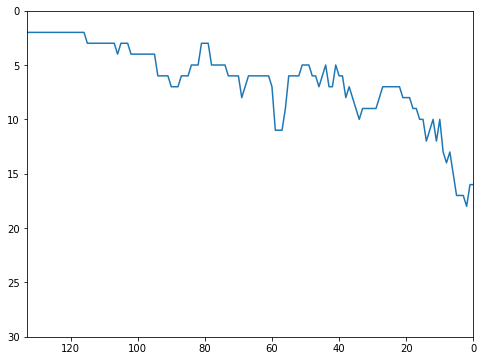

In [34]:
plt.figure(figsize = (8, 6))
plt.plot(bg_u['week_num'],bg_u['rank'])

plt.ylim(30,0)
plt.xlim(133,0)
plt.show()

### 배틀 그라운드 유저수 - 수익

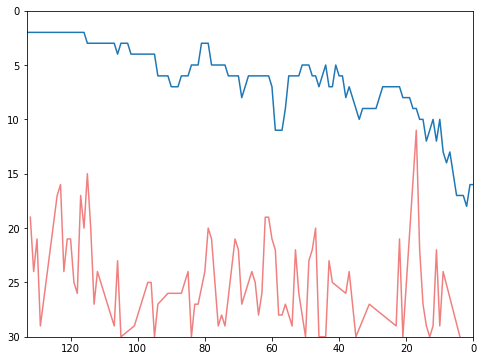

In [36]:
plt.figure(figsize = (8, 6))
plt.plot(bg_u['week_num'],bg_u['rank'])
plt.plot(bg['week_num'],bg['rank'],color = "lightcoral")
plt.ylim(30,0)
plt.xlim(133,0)
plt.show()

__2019년 높은 순위에 있던 배틀그라운드 모바일이 점점 하락세를 타는 것을 볼 수 있다.
이에 반해, 수익은 2022년 초반 더 높은 특이사항을 보였다.__

### 배틀그라운드- 브롤스타즈 간 비교

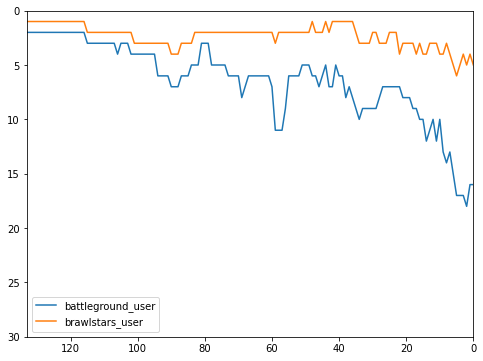

In [39]:
plt.figure(figsize = (8, 6))
plt.plot(bg_u['week_num'],bg_u['rank'],label = 'battleground_user')
plt.plot(brst_u['week_num'],brst_u['rank'],label = 'brawlstars_user')
plt.legend(loc = 'best')
plt.ylim(30,0)
plt.xlim(133,0)
plt.show()

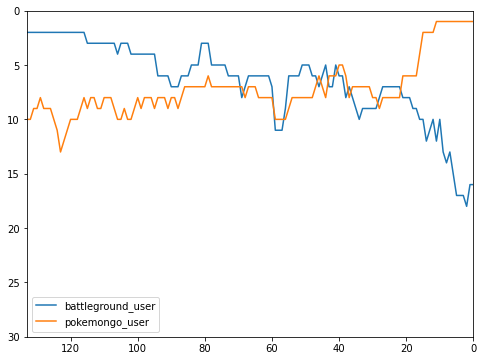

In [40]:
plt.figure(figsize = (8, 6))
plt.plot(bg_u['week_num'],bg_u['rank'],label = 'battleground_user')
plt.plot(pkm_u['week_num'],pkm_u['rank'],label = 'pokemongo_user')
plt.legend(loc = 'best')
plt.ylim(30,0)
plt.xlim(133,0)
plt.show()

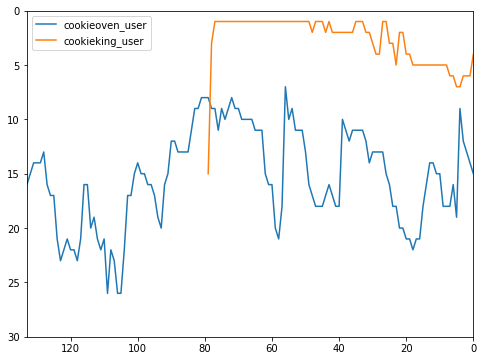

In [49]:
plt.figure(figsize = (8, 6))
plt.plot(cko_u['week_num'],cko_u['rank'],label = 'cookieoven_user')
plt.plot(ckk_u['week_num'],ckk_u['rank'],label = 'cookieking_user')
plt.legend(loc = 'best')
plt.ylim(30,0)
plt.xlim(133,0)
plt.show()

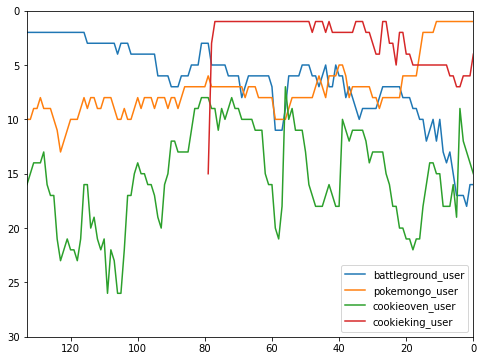

In [50]:
plt.figure(figsize = (8, 6))
plt.plot(bg_u['week_num'],bg_u['rank'],label = 'battleground_user')
plt.plot(pkm_u['week_num'],pkm_u['rank'],label = 'pokemongo_user')
plt.plot(cko_u['week_num'],cko_u['rank'],label = 'cookieoven_user')
plt.plot(ckk_u['week_num'],ckk_u['rank'],label = 'cookieking_user')
plt.legend(loc = 'best')
plt.ylim(30,0)
plt.xlim(133,0)
plt.show()